#### This work is to solely for learning the algorithm not for analysis therefore not all data preprocessing techniques will be applied here. The concentration here is to understand the algorithm.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree


In [2]:
#import data
path = 'data/car_evaluation.csv'
raw_data = pd.read_csv(path, header=None)

In [3]:
print(raw_data.head(5))

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


column description
vhigh - buying price: Very high buying price, which could be "high" or "medium."
vhigh - maintenance cost: Very high maintenance cost, which could be "high" or "medium."
number of doors: The vehicle has either 3 or 4 doors.
number of persons: The vehicle can accommodate either 2 or 4 persons.
lug_boot: The luggage boot space is either "small" or "big."
safety: The vehicle's safety rating is either "medium" or "high."
class: This is the overall classification or acceptability of the vehicle, which could be either "unacc" (unacceptable) or "acc" (acceptable).

In [4]:
raw_data.columns = ['buying price', 'maintenance cost', 'doors', 'persons', 'lug_boot', 'safety rating', 'class']
print(raw_data.head(5))

  buying price maintenance cost doors persons lug_boot safety rating  class
0        vhigh            vhigh     2       2    small           low  unacc
1        vhigh            vhigh     2       2    small           med  unacc
2        vhigh            vhigh     2       2    small          high  unacc
3        vhigh            vhigh     2       2      med           low  unacc
4        vhigh            vhigh     2       2      med           med  unacc


In [5]:
 # Define X and y
X = raw_data.drop("class", axis='columns')
y = raw_data['class']


In [6]:
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder()


In [7]:
# Transform categorical features using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, ['buying price', 'maintenance cost', 'lug_boot', 'safety rating'])
    ])

In [8]:
# Build a pipeline to first transform and then fit the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Fit the DecisionTreeClassifier
dtree = pipeline.fit(X_train, y_train)

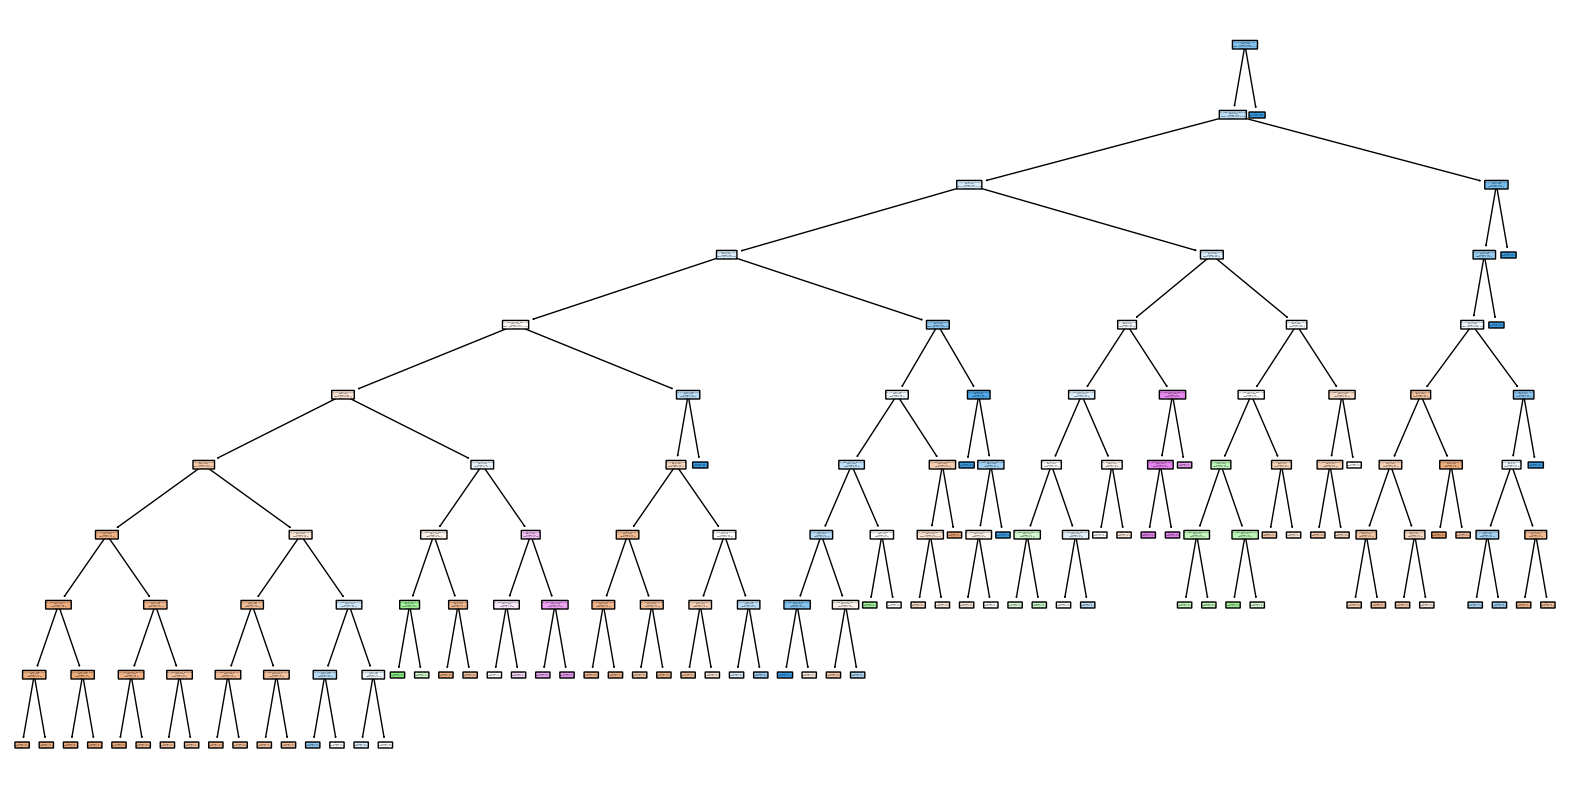

In [11]:
# Extract the trained DecisionTreeClassifier from the pipeline
dtree = pipeline.named_steps['classifier']

plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(dtree, 
          filled=True, 
          rounded=True, 
          feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(), 
          class_names=dtree.classes_,
          impurity=True)  
plt.show()

### Gini impurity
#### Gini impurity is a measurement of how good the split is.  It helps to determine how well a node classifies the data into different classes. A perfect split has a value of 0. A completely imperfect split has a value of 0.5. 

### Entropy
#### Entropy is another measure of impurity or disorder in a node. It is used in decision tree algorithms to quantify the uncertainty or randomness in the data. 

### Information Gain
#### Information Gain is based on Entropy and calculates the reduction in entropy after splitting the data on an attribute. Information Gain measures how much information is gained by splitting the data on a particular attribute. A higher Information Gain indicates a better attribute for splitting the data.

### One Hot Encoding
#### One Hot Encoding, the technique that converts categorical data into binary columns for machine learning algorithms. It creates new binary columns (0 or 1) for each category in the original column.

### LabelEncoder
#### LabelEncoder is used to convert categorical data (text or labels) into numerical data. Specifically, it assigns a unique integer to each unique category in a column. 